In [6]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

In [7]:
from tensorflow.keras.utils import to_categorical
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train_cat, y_test_cat = to_categorical(y_train), to_categorical(y_test)


In [8]:

y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)


In [9]:
from tensorflow.keras.models import Sequential

# Dictionary to store results
results = {}

# Model definition function
def create_model():
    model = Sequential([
        Input(shape=(28, 28)),
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.3),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model

Training with Adam optimizer...
Training with RMSprop optimizer...
Training with Adagrad optimizer...


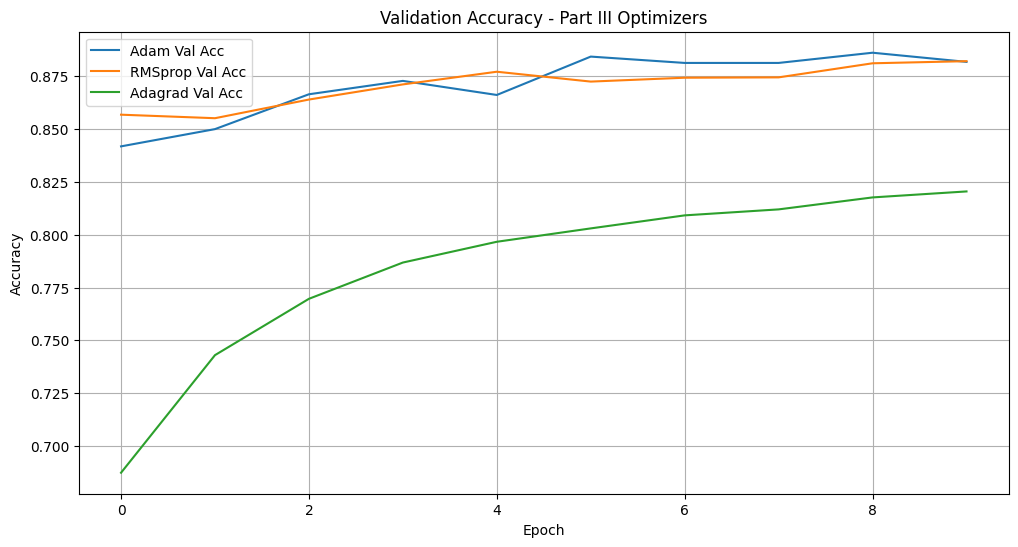

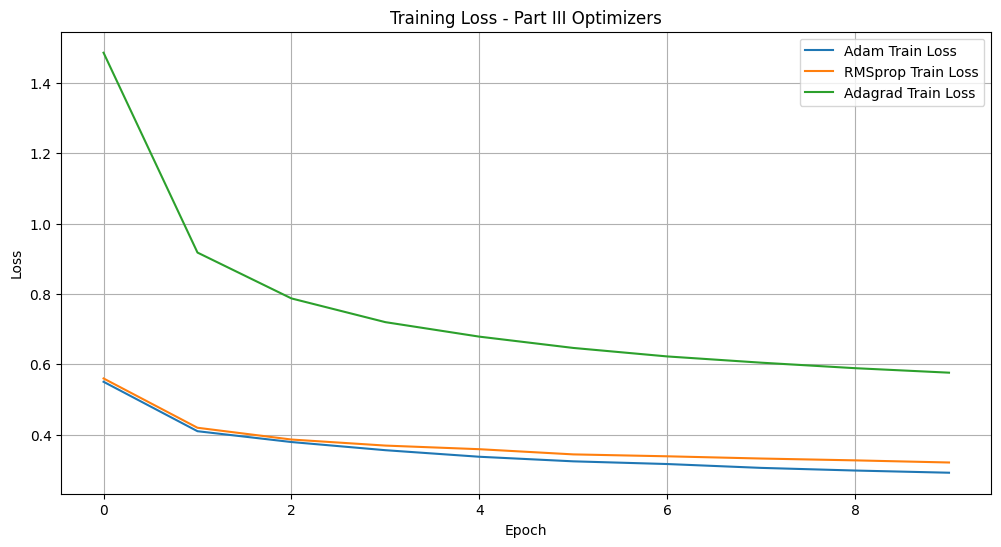

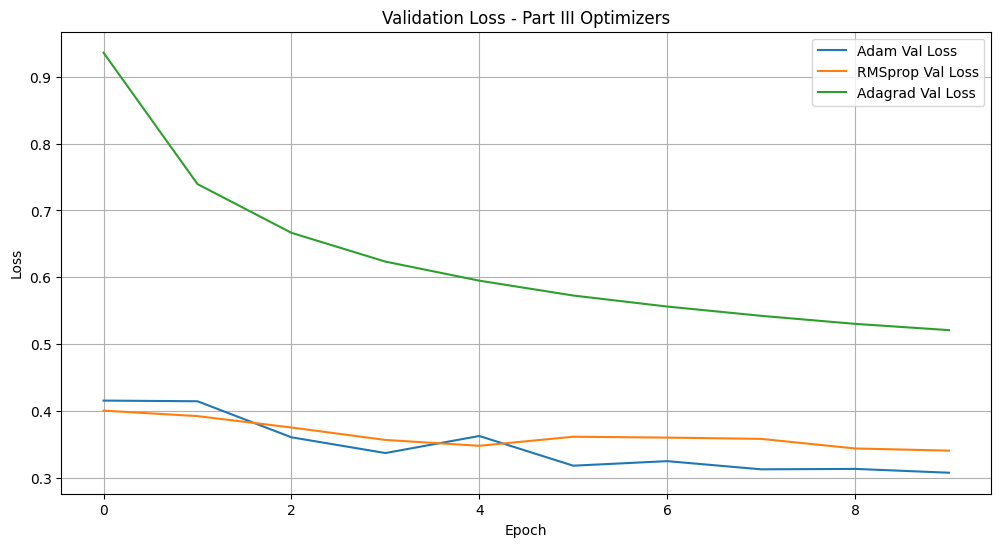


Final Results - Part III:
Adam       - Accuracy: 0.8809, F1 Score: 0.8788
RMSprop    - Accuracy: 0.8773, F1 Score: 0.8770
Adagrad    - Accuracy: 0.8138, F1 Score: 0.8088


In [ ]:
from tensorflow.keras.layers import Flatten, Dense, Dropout, Input
import numpy as np
from sklearn.metrics import f1_score
tf.config.run_functions_eagerly(False)
optimizers_part2 = {
    "Adam": lambda: tf.keras.optimizers.Adam(),
    "RMSprop": lambda: tf.keras.optimizers.RMSprop(),
    "Adagrad": lambda: tf.keras.optimizers.Adagrad(),
}

results_part2 = {}

for name, get_optimizer in optimizers_part2.items():
    print(f"Training with {name} optimizer...")
    model = create_model()
    model.compile(optimizer=get_optimizer(), loss='categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(x_train, y_train_cat, epochs=10, batch_size=64, verbose=0, validation_split=0.1)

    # Evaluate
    loss, acc = model.evaluate(x_test, y_test_cat, verbose=0)
    y_pred = np.argmax(model.predict(x_test, verbose=0), axis=1)
    f1 = f1_score(y_test, y_pred, average='weighted')

    results_part2[name] = {
        "accuracy": acc,
        "f1_score": f1,
        "history": history.history
    }

# Visualization - Validation Accuracy
plt.figure(figsize=(12, 6))
for name, res in results_part2.items():
    plt.plot(res['history']['val_accuracy'], label=f"{name} Val Acc")
plt.title("Validation Accuracy - Part III Optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# Visualization - Training Loss
plt.figure(figsize=(12, 6))
for name, res in results_part2.items():
    plt.plot(res['history']['loss'], label=f"{name} Train Loss")
plt.title("Training Loss - Part III Optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# Visualization - Validation Loss
plt.figure(figsize=(12, 6))
for name, res in results_part2.items():
    plt.plot(res['history']['val_loss'], label=f"{name} Val Loss")
plt.title("     ")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# Final performance table
print("\nFinal Results - Part III:")
for name, res in results_part2.items():
    print(f"{name:10} - Accuracy: {res['accuracy']:.4f}, F1 Score: {res['f1_score']:.4f}")

## Part III: Optimizer Analysis - Adam, RMSprop, Adagrad

In Part III, we compared three adaptive optimization algorithms (**Adam**, **RMSprop**, and **Adagrad**) using the same neural network architecture and training protocol.

### Final Performance Summary
| Optimizer | Accuracy | F1 Score  |
|-----------|----------|-----------|
| Adam      | 0.8809   | 0.8788    |
| RMSprop   | 0.8773   | 0.8770    |
| Adagrad   | 0.8138   | 0.8088    |

---

### Key Observations

1. **Adam Dominates**  
   - Achieved the highest accuracy (**88.09%**) and F1 score (**87.88%**), outperforming RMSprop by **0.36%** in accuracy  
   - Combines momentum and adaptive learning rates for:  
     - Faster convergence through gradient history  
     - Stable training via per-parameter learning rate adjustments  

2. **RMSprop's Competitive Performance**  
   - Delivered strong results (87.73% accuracy) despite lacking momentum  
   - Narrow **0.36% gap** from Adam highlights its effectiveness for:  
     - Adaptive learning rate normalization  
     - Handling non-stationary objectives  

3. **Adagrad's Limitations**  
   - Significant performance drop (81.38% accuracy) due to:  
     - Aggressive learning rate decay from cumulative gradient squares  
     - Poor adaptation to complex loss landscapes  
   - **6.71% accuracy gap** behind Adam makes it unsuitable for this task  

4. **Metric Consistency**  
   - Adam and RMSprop maintained tight alignment between accuracy and F1 scores (<0.003 difference)  
   - Adagrad showed larger discrepancy (0.005 gap), suggesting class imbalance challenges  

---

### Conclusion

1. **Adam as the Benchmark**  
   Adam's hybrid approach (momentum + adaptation) solidifies its position as the top choice for image classification, achieving **88.09% accuracy**.

2. **Adaptive Optimizer Superiority**  
   Both Adam and RMSprop outperformed all SGD variants from Part II, demonstrating the critical role of **per-parameter learning rate tuning** in deep learning.

3. **Adagrad's Obsolescence**  
   The optimizer's rapid learning rate decay renders it ineffective for modern deep networks compared to Adam/RMSprop.

4. **Practical Recommendations**  
   - Default to Adam for most classification tasks  
   - Use RMSprop if computational resources are constrained  
   - Monitor Adagrad for legacy systems only  

5. **Future Directions**  
   - Explore Adam variants (AdamW, Nadam) for improved generalization  
   - Test optimizer performance on larger architectures (e.g., CNNs)  
   - Investigate learning rate warmup strategies for Adam  